# Importing Libaries

In [4]:
import numpy as np
import matplotlib.pyplot as plt


# Read and Explore Data

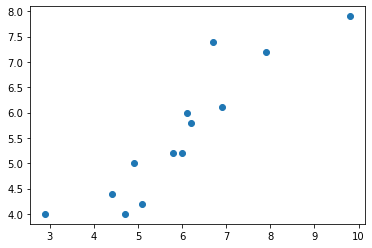

In [5]:
Data_points = np.genfromtxt("RegData.csv" ,  delimiter= ',')
X_Data = Data_points[:,0]
Y_Data = Data_points[:,1]

plt.scatter(X_Data , Y_Data)
plt.show()

# Batch GD
## Hypotysis Function : theta_0 X1 + theta_1 x2

In [6]:
feture = np.concatenate((np.ones(len(X_Data)).reshape( len(X_Data), 1) 
                         , X_Data.reshape(len(X_Data) , 1))  , axis = 1)

theta = np.array([0 , 0 ])
Y= np.dot(theta ,feture.T)
alpha = 0.001
Data_length = len(X_Data)
Epoch = 100

Jtheta = []
theta_zero = []
theta_one = []

for i in range(Epoch):
    theta_zero.append(theta[0])
    theta_one.append(theta[1])
    Y= np.dot(theta ,feture.T)
    Jtheta.append((alpha/2)*(np.sum(np.square(np.dot( (Y-Y_Data) , feture)) ,axis = 0)/Data_length))
    theta = theta - alpha*(np.sum(np.dot( (Y-Y_Data) , feture) ,axis = 0)/Data_length)
    

print(theta)

[0.79102528 0.79102528]


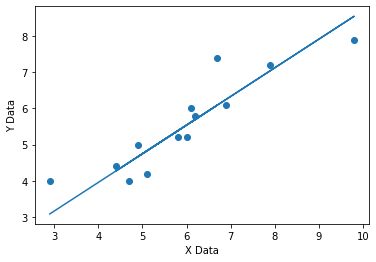

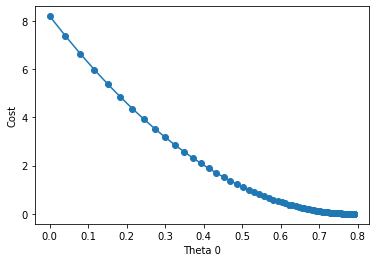

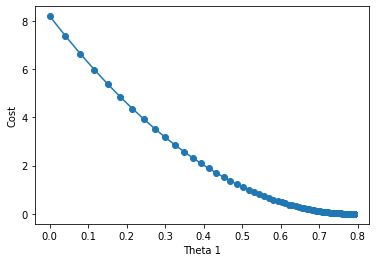

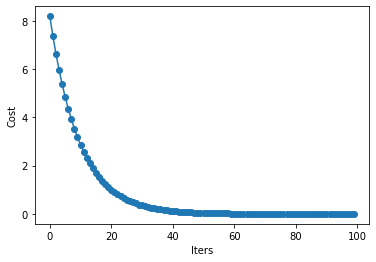

In [7]:
plt.scatter(X_Data , Y_Data)
plt.plot(X_Data, theta[0]+ X_Data * theta[1]) 
plt.xlabel("X Data")
plt.ylabel("Y Data")
plt.show()

plt.plot(theta_zero ,Jtheta ,'-o') 
plt.xlabel("Theta 0")
plt.ylabel("Cost")
plt.show()

plt.plot(theta_one , Jtheta , '-o')
plt.xlabel("Theta 1")
plt.ylabel("Cost")
plt.show()


plt.plot(np.arange(Epoch) , Jtheta , '-o')
plt.xlabel("Iters")
plt.ylabel("Cost")
plt.show()

# Batch GD With Stoping Condition

In [39]:
theta = np.array([0 , 0 ])
alpha = 0.001
Data_length = len(X_Data)
Epoch = 100
Jtheta = []
theta_zero = []
theta_one = []
Not_first_iter = 0
Max_no_iter = 50

for j in range(Max_no_iter):
    if Not_first_iter!=0 and np.abs(Jtheta[-1]-Jtheta[-2]) < 0.01:
        break
    for i in range(Epoch):
        Not_first_iter+=1
        theta_zero.append(theta[0])
        theta_one.append(theta[1])
        Y= np.dot(theta ,feture.T)
        Jtheta.append((alpha/2)*(np.sum(np.square(np.dot( (Y-Y_Data) , feture)) ,axis = 0)/Data_length))
        theta = theta - alpha*(np.sum(np.dot( (Y-Y_Data) , feture) ,axis = 0)/Data_length)
        
print(theta)        

[0.79102528 0.79102528]


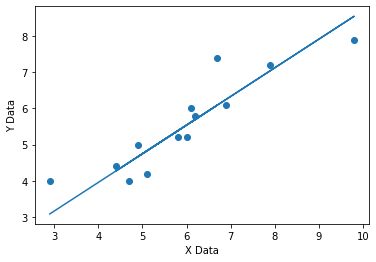

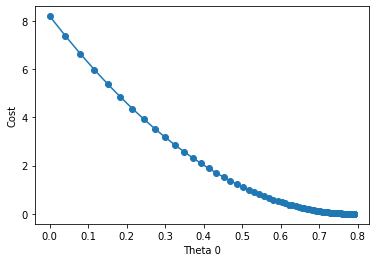

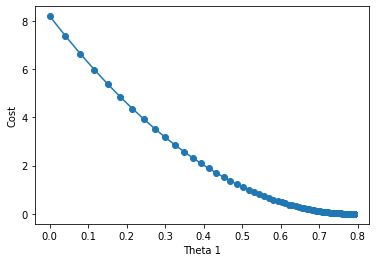

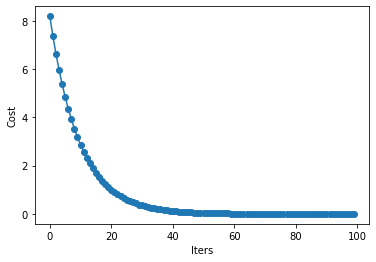

In [40]:
plt.scatter(X_Data , Y_Data)
plt.plot(X_Data, theta[0]+ X_Data * theta[1]) 
plt.xlabel("X Data")
plt.ylabel("Y Data")
plt.show()

plt.plot(theta_zero ,Jtheta ,'-o') 
plt.xlabel("Theta 0")
plt.ylabel("Cost")
plt.show()

plt.plot(theta_one , Jtheta , '-o')
plt.xlabel("Theta 1")
plt.ylabel("Cost")
plt.show()


plt.plot( Jtheta , '-o')
plt.xlabel("Iters")
plt.ylabel("Cost")
plt.show()

## Stochastic GD

In [49]:
theta = np.array([0 , 0 ])
alpha = 0.001
Data_length = len(X_Data)
Epoch = 100
Not_first_iter = 0
Jtheta = []
theta = np.zeros(2)
theta_zero = []
theta_one = []
Max_no_iter = 50
for j in range(Max_no_iter):
   
    if Not_first_iter > 1 and np.abs(Jtheta[-1]-Jtheta[-2]) < 0.0001:
            break
    Not_first_iter+=1        
    theta_zero.append(theta[0])
    theta_one.append(theta[1])
    for i in range(Data_length):
        Y= np.dot(theta ,feture[i].T)
        if i == Data_length-1:
            Jtheta.append((alpha/2)*(np.sum(np.square(np.dot( (Y-Y_Data[i]) , feture[i])) ,axis = 0)))
        theta = theta - alpha*(np.sum(np.dot( (Y-Y_Data[i]) , feture[i]) ,axis = 0))
        
print(theta)  

[0.77345411 0.77345411]


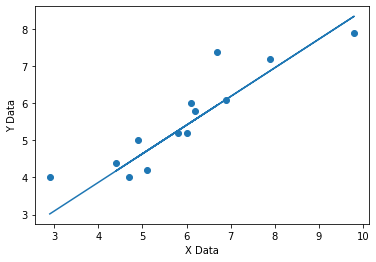

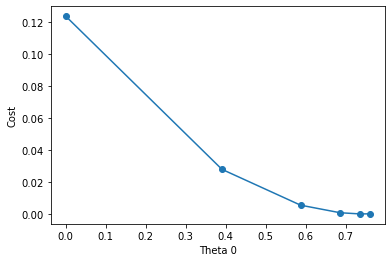

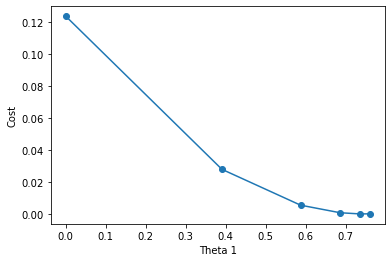

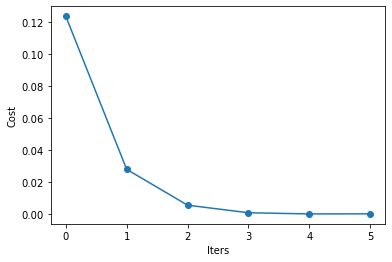

In [50]:
plt.scatter(X_Data , Y_Data)
plt.plot(X_Data, theta[0]+ X_Data * theta[1]) 
plt.xlabel("X Data")
plt.ylabel("Y Data")
plt.show()

plt.plot(theta_zero ,Jtheta ,'-o') 
plt.xlabel("Theta 0")
plt.ylabel("Cost")
plt.show()

plt.plot(theta_one , Jtheta , '-o')
plt.xlabel("Theta 1")
plt.ylabel("Cost")
plt.show()


plt.plot( Jtheta , '-o')
plt.xlabel("Iters")
plt.ylabel("Cost")
plt.show()